In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib as mpl

sns.set_theme("paper", "whitegrid")

import os
import json

palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

In [13]:

results_root = '/home/kwatchar3/bss_spatial_eval/results/delay2'

ddfs = os.listdir(results_root)
# print(ddfs)


dfs = []

for d in ddfs:
    if 'results-ok.csv' in os.listdir(os.path.join(results_root, d)):
        df = pd.read_csv(os.path.join(results_root, d, 'results-ok.csv'))
    else:
        continue
    with open(os.path.join(results_root, d, 'args.json'), "r") as f:
        args = json.load(f)
        
    if args['estim_filter_kwargs']:
        df['ldelay'], df['rdelay'] = args['estim_filter_kwargs'][0]['kwargs']['positions']
    else:
        df['ldelay'] = 0
        df['rdelay'] = 0
    dfs.append(df)

df = pd.concat(dfs)

In [14]:
df

,Unnamed: 0,spr/num,sfr/num,cost,true_pan,est_pan,est_deviation,file,ldelay,rdelay
0,0,-4.283471,-3.824375,3.062639e-17,0.0,-45.0,-45.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,0.0005,0.000063
1,1,-4.330328,-3.824375,2.743279e-17,0.0,-30.0,-30.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,0.0005,0.000063
2,2,-4.357371,-3.824375,2.371377e-17,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,0.0005,0.000063
3,3,-1.970195,8.056283,2.623414e-18,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,0.0005,0.000063
4,4,-1.548361,8.056283,2.188775e-18,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,0.0005,0.000063
...,...,...,...,...,...,...,...,...,...,...
51,51,-4.223418,-3.544130,1.333783e-15,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,0.0005,0.000250
52,52,-4.010953,-0.101129,1.080949e-15,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,0.0005,0.000250
53,53,-3.945037,-0.101129,1.063284e-15,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,0.0005,0.000250
54,54,-3.863467,-0.101129,1.046823e-15,0.0,30.0,30.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,0.0005,0.000250


[(-20.0, 20.0)]

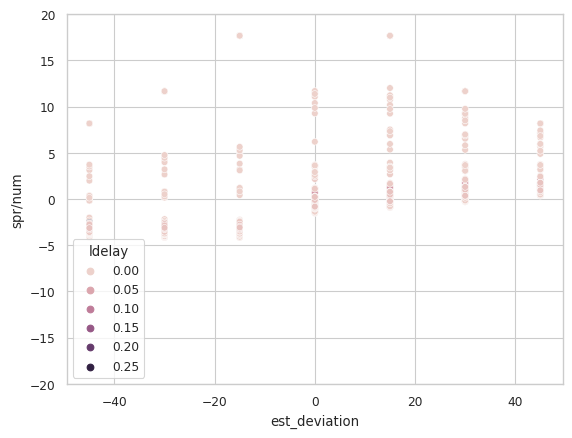

In [27]:
ax = sns.scatterplot(df[df['rdelay'] == 0], hue='ldelay', y='spr/num', x='est_deviation')
ax.set(ylim=[-20, 20])